<a href="https://colab.research.google.com/github/honehaniwa/Gasyori100knock/blob/main/Question01_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像処理100本ノック
https://github.com/yoyoyo-yo/Gasyori100knock

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

In [2]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg

--2021-04-02 16:09:50--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2021-04-02 16:09:50 (95.7 MB/s) - ‘imori.jpg’ saved [12638/12638]



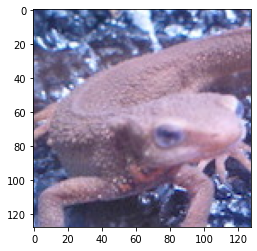

In [3]:
img_orig = cv2.imread("imori.jpg")
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

In [4]:
# 便利そうな関数を先に作っとく

def show(img):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


# Q. 1 - 10

## Q.1. チャネル入れ替え

画像を読み込み、RGBをBGRの順に入れ替えよ。

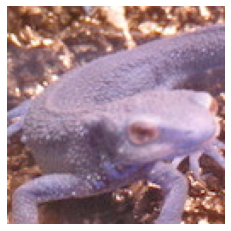

In [ ]:
def rotate(img):
    return img[..., ::-1]

img_q1 = rotate(img_orig)
show(img_q1)

## Q.2. グレースケール化

画像をグレースケールにせよ。
グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Y = 0.2126 R + 0.7152 G + 0.0722 B

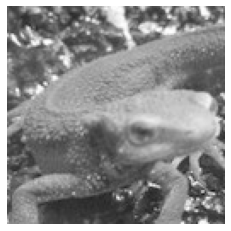

In [ ]:
def gray(img):
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    ret = 0.2126*R + 0.7152*G + 0.0722*B
    ret = np.clip(ret, 0, 255)
    return ret.astype(np.uint8)

img_copy = img_orig.copy()
img_copy.astype(np.float32)
img_q2 = gray(img_copy)
show(img_q2)

## Q.3. 二値化
画像を二値化せよ。
二値化とは、画像を黒と白の二値で表現する方法である。
ここでは、グレースケールにおいて閾値を128に設定し、下式で二値化する。

```bash
y = { 0 (if y < 128)
     255 (else) 
```

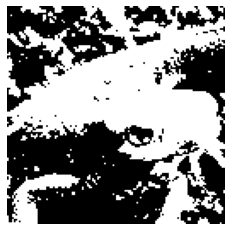

In [ ]:
def black_or_white(img):
    return np.where(img < 128, 0, 255)

img_copy = img_orig.copy()
img_q3 = black_or_white(img_q2)
img_q3 = img_q3.astype(np.uint8)
show(img_q3)

# Q.4. 大津の二値化
大津の二値化を実装せよ。 大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する手法である。 これはクラス内分散とクラス間分散の比から計算される。


閾値 130


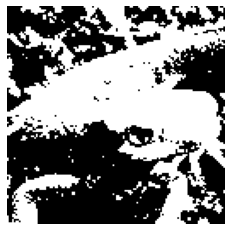

In [ ]:
def otsu_bin(img):
    sigma = 0
    max_th = 0
    h, w = img.shape

    for i in range(1, 256):
        v0 = out[np.where(out <  i)]
        v1 = out[np.where(out >= i)]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w0 = len(v0) / (h * w)
        w1 = len(v1) / (h * w)
        now_sigma = w0 * w1 * ((m0 - m1) ** 2)
        if now_sigma > sigma:
            sigma = now_sigma
            max_th = i
    
    print("閾値", max_th)
    out[out <  max_th] = 0
    out[out >= max_th] = 255

    return out

out = gray(img_orig)
out = otsu_bin(out)
show(out)

# Q.5. HSV変換
HSV変換を実装して、色相Hを反転せよ。

HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法である。

In [ ]:
def calc_H(min_c, max_c, rgb):
    '''
    imgが2次元だと思ってて実装した遺品
    '''
    B, G, R = rgb
    # print(R, G, B)
    if min_c == max_c:
        return 0
    elif min_c == B:
        return (60 * (G - R) / (max_c - min_c) + 60) % 360
    elif min_c == R:
        return (60 * (B - G) / (max_c - min_c) + 180) % 360
    else:
        return (60 * (R - B) / (max_c - min_c) + 300) % 360
    
def _HSV2BGR(img, HSV):
    '''
    同じく遺品
    '''
    out = np.zeros_like(img)
    for i, H, S, V in enumerate(HSV):
        C = S
        H2 = H / 60
        X = C * (1 - abs(H % 2 - 1))
        if H2 < 1:
            added = [C, X, 0]
        elif H2 < 2:
            added = [X, C, 0]
        elif H2 < 3:
            added = [0, C, X]
        elif H2 < 4:
            added = [0, X, C]
        elif H2 < 5:
            added = [X, 0, C]
        elif H2 < 6:
            added = [C, 0, X]
        else:
            added = [0, 0, 0]
        VC = V - C
        out[i] = np.array( [ VC +added[2], VC + added[1], VC + added[0]] )
    out = np.clip(out, 0, 1)
    out = (out * 255).astype(uint8)
    return out

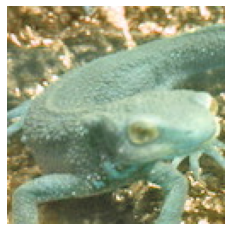

In [ ]:
def BGR2HSV(img):
    img = img.copy() / 255.
    HSV = np.zeros_like(img, dtype=np.float32)
    max_val = np.max(img, axis=2)
    min_val = np.min(img, axis=2)
    min_args = np.argmin(img, axis=2)
    
    # calc H
    HSV[..., 0][np.where(max_val == min_val)] = 0
    indexs = np.where(min_args == 0) # B
    HSV[..., 0][indexs] = 60 * (img[..., 1][indexs] - img[..., 2][indexs]) / (max_val[indexs] - min_val[indexs]) + 60
    indexs = np.where(min_args == 1) # G
    HSV[..., 0][indexs] = 60 * (img[..., 2][indexs] - img[..., 0][indexs]) / (max_val[indexs] - min_val[indexs]) + 300
    indexs = np.where(min_args == 2) # R
    HSV[..., 0][indexs] = 60 * (img[..., 0][indexs] - img[..., 1][indexs]) / (max_val[indexs] - min_val[indexs]) + 180
    
    # calc S
    HSV[..., 1] = (max_val - min_val).copy()

    # calc V
    HSV[..., 2] = max_val.copy()

    return HSV

def HSV2BGR(img, HSV):
    img = img.copy() / 255

    max_val = np.max(img, axis=2).copy()
    min_val = np.min(img, axis=2).copy()
    
    out = np.zeros_like(img)
    
    C = HSV[..., 1]
    H2 = HSV[..., 0] / 60
    X = C * (1 - np.abs( H2 % 2 - 1))
    Z = np.zeros_like(H2)

    added = [ [Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C] ]
    for i in range(6):
        indexs = np.where((i <= H2) & (H2 < (i+1)))
        out[..., 0][indexs] = (HSV[..., 2] - C)[indexs] + added[i][0][indexs]
        out[..., 1][indexs] = (HSV[..., 2] - C)[indexs] + added[i][1][indexs]
        out[..., 2][indexs] = (HSV[..., 2] - C)[indexs] + added[i][2][indexs]

    out[np.where(max_val == min_val)] = 0
    np.clip(out, 0, 1)
    out = (out * 255).astype(np.uint8)
    return out

HSV_img = BGR2HSV(img_orig)
# 色相反転
HSV_img[..., 0] = (HSV_img[..., 0] + 180) % 360
out = HSV2BGR(img_orig, HSV_img)
# print(out)
show(out)

# Q.6. 減色処理
ここでは画像の値を256^3から4^3、すなわちR,G,B in `{32, 96, 160, 224}`の各4値に減色せよ。 これは量子化操作である。 各値に関して、以下の様に定義する。

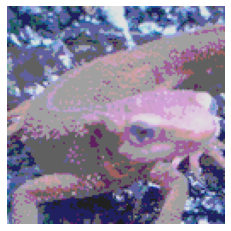

In [14]:
def decreace_color(img):
    out = img.copy()
    out[(0 <= out) & (out < 64)] = 32
    out[(64 <= out) & (out < 128)] = 96
    out[(128 <= out) & (out < 192)] = 160
    out[(224 <= out) & (out < 256)] = 224
    return out
out = decreace_color(img_orig)
show(out)

# Q.7. 平均プーリング
ここでは画像をグリッド分割(ある固定長の領域に分ける)し、かく領域内(セル)の平均値でその領域内の値を埋める。 このようにグリッド分割し、その領域内の代表値を求める操作はPooling(プーリング) と呼ばれる。 これらプーリング操作はCNN(Convolutional Neural Network) において重要な役割を持つ。



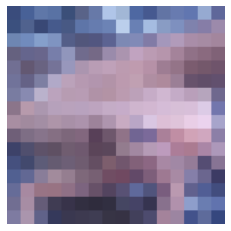

In [21]:
def mean_pooling(img, siz = 8):
    out = img.copy()
    H, W, C = out.shape
    # print(H, W, C)
    # print(img)
    for i in range(H // siz):
        for j in range(W // siz):
            for c in range(C):
                out[siz * i: siz * (i+1), siz * j: siz * (j+1), c] = np.mean(out[siz * i: siz * (i+1), siz * j: siz * (j+1), c]).astype(np.int8)

    return out
out = mean_pooling(img_orig)
show(out)

# Q.8. Maxプーリング
ここでは平均値でなく最大値でプーリングせよ。

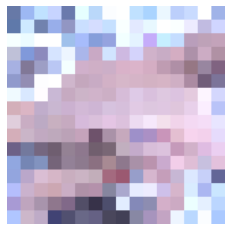

In [22]:
def max_pooling(img, siz = 8):
    out = img.copy()
    H, W, C = out.shape
    # print(H, W, C)
    # print(img)
    for i in range(H // siz):
        for j in range(W // siz):
            for c in range(C):
                out[siz * i: siz * (i+1), siz * j: siz * (j+1), c] = np.max(out[siz * i: siz * (i+1), siz * j: siz * (j+1), c]).astype(np.int8)

    return out
out = max_pooling(img_orig)
show(out)

# Q.9. ガウシアンフィルタ
ガウシアンフィルタ(3x3、標準偏差1.3)を実装し、imori_noise.jpgのノイズを除去せよ。

ガウシアンフィルタとは画像の平滑化（滑らかにする）を行うフィルタの一種であり、ノイズ除去にも使われる。

ノイズ除去には他にも、メディアンフィルタ(Q.10)、平滑化フィルタ(Q.11)、LoGフィルタ(Q.19)などがある。

ガウシアンフィルタは注目画素の周辺画素を、ガウス分布による重み付けで平滑化し、次式で定義される。 このような重みはカーネルやフィルタと呼ばれる。

ただし、画像の端はこのままではフィルタリングできないため、画素が足りない部分は0で埋める。これを0パディングと呼ぶ。 かつ、重みは正規化する。(sum g = 1)

In [50]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori_noise.jpg

--2021-04-02 18:35:29--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori_noise.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14696 (14K) [image/jpeg]
Saving to: ‘imori_noise.jpg.1’

imori_noise.jpg.1   100%[===================>]  14.35K  --.-KB/s    in 0.001s  

2021-04-02 18:35:29 (27.4 MB/s) - ‘imori_noise.jpg.1’ saved [14696/14696]



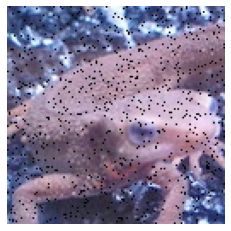

In [51]:
img_noise = cv2.imread("imori_noise.jpg")
show(img_noise)

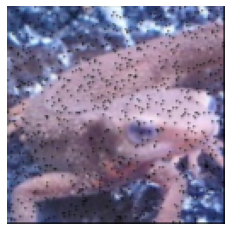

In [54]:
def gausian_filter(img, sigma = 1.3, siz = 3):
    H, W, C = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out = np.zeros((H + padding*2, W + padding*2, C), dtype = np.float)
    out[padding: padding+H, padding: padding+W] = img.copy()

    K = np.zeros((siz, siz), dtype=np.float)
    for x in range(siz):
        for y in range(siz):
            K[y, x] = np.exp( -((y-siz)**2 + (x-siz)**2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * (sigma**2))
    K /= K.sum()
    
    out2 = out.copy()

    for x in range(H):
        for y in range(W):
            for c in range(C):
                out[padding+y, padding+x, c] = np.sum(K * out2[y: y+siz, x:x+siz, c])

    out = np.clip(out[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out
out = gausian_filter(img_noise)
show(out)

# Q.10 メディアンフィルタ
メディアンフィルタ(3x3)を実装し、imori_noise.jpgのノイズを除去せよ。

メディアンフィルタとは画像の平滑化を行うフィルタの一種である。

これは注目画素の3x3の領域内の、メディアン値(中央値)を出力するフィルタである。 これもゼロパディングせよ。

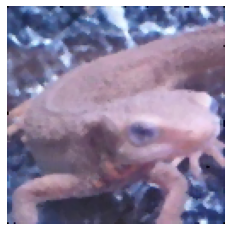

In [56]:
def gausian_filter(img, sigma = 1.3, siz = 3):
    H, W, C = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out = np.zeros((H + padding*2, W + padding*2, C), dtype = np.float)
    out[padding: padding+H, padding: padding+W] = img.copy()
    
    out2 = out.copy()

    for x in range(H):
        for y in range(W):
            for c in range(C):
                out[padding+y, padding+x, c] = np.median(out2[y: y+siz, x:x+siz, c])

    out = np.clip(out[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out
out = gausian_filter(img_noise)
show(out)